<a href="https://colab.research.google.com/github/ailuj/BayesianDeepLearning/blob/playground/Theory_ongoing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bayesian Inference Basics: The Posterior

Below we defined a biased coin which is quite slowly approaches to its true mean. The setting is as follows:
* A coin that returns heads with 0.99 probability and tails with 0.01 probability
* A latent variable that chooses this coin with 0.66 probability, else it chooses tails without tossing coins.
* We are concerned with the probability of heads, $P(x)$
* With this parameters, we keep $P(\theta) =  P(x)$ for simplicity.

In [0]:
def coin(times):
    target = []
    for _ in range(times):
        latent = np.random.random()
        if(latent <= 2.0/3.0):
            coin_A = np.random.random()
            if(coin_A <= 0.9):
                result = 1
            else:
                result = 0
        else:
            result = 0
        target.append(result)
    MLE = np.mean(target)
    return MLE  

In [4]:
import numpy as np

np.random.seed(200)
a = np.mean(coin(10))
b = np.mean(coin(100))
c = np.mean(coin(1000))
d = np.mean(coin(10000))
e = np.mean(coin(100000))
f = np.mean(coin(1000000))
print(a,b,c,d,e,f)

0.4 0.52 0.589 0.5952 0.60108 0.599653


The maximum likelihood estimator is equal to the mean of the samples. There are two visible drawbacks:
* MLE is biased in small samples
* MLE doesn't account for the uncertainty difference between 10000 draws and a million draws



How can we make an inference of the coin given the observations ?

By Bayes' rule, we can define the posterior as follows

$$ P(x|\theta)P(x) = P(\theta| x)p(\theta) $$ <br> 
$$P(x|\theta) = \frac{P(\theta | x)p(\theta)}{P(x)} $$



We have designed the experiment in a way that $P(\theta) =  P(x)$ for simplicity.



$$ P(\theta| x) = \frac{\binom{N}{k} p^{k}(1-p)^{N-k}P(\theta)} {P(x)}$$

Note 1: During MAP estimation the following proportionality is used by assuming that $P(x)$ is deterministic: $ P(\theta | x) \propto P(x | \theta) P(\theta)$ <br>
Note 2: However the main issue with Bayesian estiation is approximating $P(x)$

We got our posterior distribution as $P(\theta| x) = \binom{N}{k} p^{k}(1-p)^{N-k}.
$ Let's take samples from our posterior distribution:

In [0]:
np.random.seed(200)
posterior_sample_1000 = np.random.binomial(1000, 0.589, size = [1000,])
posterior_sample_100 = np.random.binomial(100, 0.52, size = [100,])
posterior_sample_10 = np.random.binomial(10, 0.4, size = [10,])

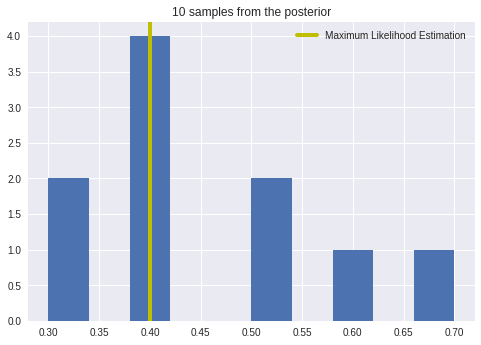

Mean: 0.45
Standard deviation: 0.12041594578792293
Uncertainty is high and far from the true mean 0.59


In [7]:
from matplotlib import pyplot as plt
plt.hist(posterior_sample_10/10.0)
plt.axvline(np.median(posterior_sample_10/10.0), color = 'y', linewidth = 4, label = 'Maximum Likelihood Estimation')
plt.title('10 samples from the posterior')
plt.legend()
plt.show()
print('Mean: {}'.format(np.mean(posterior_sample_10/10.0)))
print('Standard deviation: {}'.format(np.std(posterior_sample_10/10.0)))
print('Uncertainty is high and far from the true mean 0.59')

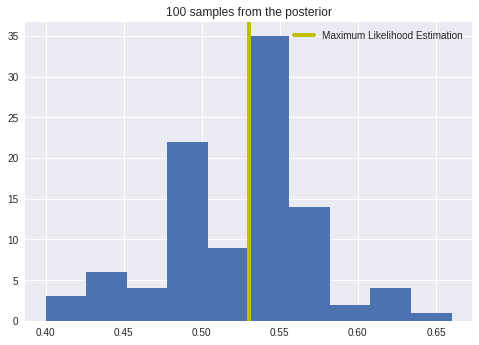

Mean: 0.5238
Standard deviation: 0.0484516253597338
Uncertainty is middle and middle distance to the true mean 0.59


In [8]:
from matplotlib import pyplot as plt
plt.hist(posterior_sample_100/100.0)
plt.axvline(np.median(posterior_sample_100/100.0), color = 'y', linewidth = 4, label = 'Maximum Likelihood Estimation')
plt.title('100 samples from the posterior')
plt.legend()
plt.show()
print('Mean: {}'.format(np.mean(posterior_sample_100/100.0)))
print('Standard deviation: {}'.format(np.std(posterior_sample_100/100.0)))
print('Uncertainty is middle and middle distance to the true mean 0.59')

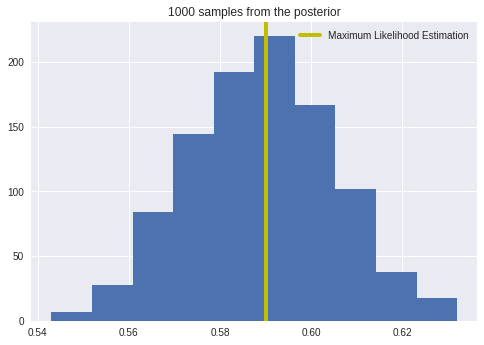

Mean: 0.58905
Standard deviation: 0.015947021665502308
Uncertainty is low and close to the true mean 0.59


In [9]:
from matplotlib import pyplot as plt
plt.hist(posterior_sample_1000/1000.0)
plt.axvline(np.median(posterior_sample_1000/1000.0), color = 'y', linewidth = 4, label = 'Maximum Likelihood Estimation')
plt.title('1000 samples from the posterior')
plt.legend()
plt.show()
print('Mean: {}'.format(np.mean(posterior_sample_1000/1000.0)))
print('Standard deviation: {}'.format(np.std(posterior_sample_1000/1000.0)))
print('Uncertainty is low and close to the true mean 0.59')

Summary: 
* With Bayesian inference, we can obtain **the whole distribution** over our parameters, namely for our predictions. And we sample from the posterior predictive distribution.
* In small samples like when we take 10 tosses, Bayesian inference reminds us that the true mean could be far away from our mean estimation.
* It is quite complicated to choose a prior $P(\theta)$, and approximating the evidence $P(x) = \int P(x, \theta)d\theta$. In deep learning setting, we focus on the latter.

# 2. Estimating/Approximating P(x)

$$P(\theta | x) =\frac{P(x | \theta) P(\theta)}{P(x)} \implies P(\theta | x) =\frac{P(x, \theta)}{\int P(x, \theta)d\theta}$$

 The posterior cannot usually be computed directly due to the high-dimensional integral in the denominator. It has to be approximated. 

### Hamiltonian Monte Carlo Markov Chain

The idea behind Markov Chain Monte Carlo (MCMC) is to construct a Markov Chain on the state space of  𝑥
x
 , whose stationary posterior distribution is the target density. Markov Chain allows us to take correlated samples and it is particularly useful to arrive at the typical set during sampling from the posterior distribution. We start MCMC from an arbitrary initial state and continue until we take samples only from the typical set. The samples from the beginning until the time we arrived to the typical set will be ignored. This period is called as burn-in phase. The MCMC forgets where it started from, and stays sampling exactly from the area we wanted.

Although the idea of MCMC approximation makes sense, there is an inherent problem with it: It is hard to be sure whether we passed burn-in phase and if so, we might not live enough to see it occurring. Even in small samples, it takes a long time for MCMC sampling to converge. (Murphy, Chapter 24)

Hamiltonian MCMC (HMC) constructs "Markov transitions by lifting into, exploring, and projecting from the expanded space" of the typical set (Betancourt 2018). It covers the typical set very fast in comparison to the classical MCMC and provides with a physical explanation. Therefore, it is a big step towards improving the issues with duration and diagnosis of the burn-in phase of MCMC.

Check the link out, we have a gif of it, it is cool

http://chi-feng.github.io/mcmc-demo/app.html#HamiltonianMC,banana

### Variational Inference

The main idea in variational inference is to pick an approximation to $q(\theta)$ and then to make this approximation as close as possible to the posterior $p(\theta | x)$. The problem is that the posterior is intractable, hence the optimization is not solvable. Yet, we can find a lower bound to this divergence, called **Evidence Lower Bound (ELBO)**. We maximize ELBO with respect to $\lambda$, given by:

$$ \lambda* = \underset{\lambda}{\operatorname{argmin}}KL(q(\theta | \lambda) || p(\theta | x)) \iff \lambda* = \underset{\lambda}{\operatorname{argmin}} \mathop{\mathbb{E}}_{q(\theta | \lambda)}[ logq(\theta; \lambda) - log p(\theta | x)] $$

$$ELBO(\lambda) = \mathop{\mathbb{E}}_{q(\theta | \lambda)}[logp(x,\theta) - logq(\theta; \lambda] \iff ELBO(\lambda) = \mathop{\mathbb{E}}_{q(\theta | \lambda)}[logp(x,\theta)] - \mathop{\mathbb{E}}_{q(\theta | \lambda)}[logq(\theta; \lambda)] $$

Summary:
   * MCMC may not converge and takes much time
   * HMC samples faster using physics. HMC is more efficient than MCMC for high dimensional big data.
   * VI is faster and reliable in small sets. It is easy to determinate where to stop, and it often provides a lower bound on the log-likelihood.
   * MCMC methods are usually better than VI when applied to huge datasets. 
   * MCMC methods are applicable to a broader range of models. 

# 3. Application to Neural Networks: Stochastic Weights

Working with neural networks, we consider weights $W$ as the stochastic parameter $\theta$, while the inference is done for $𝑃(W|𝑥)$

Optional: Show the Gal's Argument that dropout approximation is equal to maximizing ELBO with an extensive deep neural network architecture, having dropouts at each layer. Argue why this is not Bayesian: We maximize the evidence lower bound (ELBO) by applying  dropout approximation, but this ELBO is too high to consider that minimizing the KL divergence.